Image Classification Rock Paper *Scissor*

In [1]:
from google.colab import drive #library pada colab yang digunakan untuk mengkoneksikan dengan akun google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import io, zipfile #library atau modul yang digunakan untuk mengekstrak file zip, dalam hal ini adalah rockpaperscissors.zip

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/rockpaperscissors.zip", 'r') #file yang ingin di ekstrak
zip_ref.extractall("/tmp") #ekstrack dataset ke folder temp di google collab
zip_ref.close()

In [0]:
folder="/tmp/rockpaperscissors/" #menyipa direktori folder rockpaperscissors kedalam variable folder untuk memudahkan pemrosesan

In [5]:
import os #library atau modul untuk berinteraksi dengan operating system
os.mkdir('/tmp/traindirectory/') #membuat direktory baru dengan nama traindirectory
os.mkdir('/tmp/validationdirectory/') #membuat direktory baru dengan nama validationdirectory
os.listdir(folder)#menampilkan isi folder hasil ekstraksi

['scissors', 'rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [0]:
from distutils.dir_util import copy_tree

train_dir = '/tmp/traindirectory/'         #tempat menaruh train set
validation_dir = '/tmp/validationdirectory/' #tempat menaruh validation set

for p in ['paper','scissors','rock']: #iterasi
  tr_dir = '/tmp/traindirectory/' + p 
  va_dir = '/tmp/validationdirectory/' + p 
      
  if not (os.path.isdir(tr_dir)): #membuat dan mengcopy ke folder train
    src = folder + p
    os.mkdir(tr_dir)
    copy_tree(src, tr_dir)

  if not (os.path.isdir(va_dir)):#membuat dan mengcopy ke folder validation
    src = folder + p
    os.mkdir(va_dir)
    copy_tree(src, va_dir)

In [7]:
len(os.listdir(tr_dir))

726

Data Preparation

In [0]:
epochs = 50 #inisiasi epoch


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = .2
)
traindata= train_dir
validationdata = validation_dir
batch_size = 35

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .2
)
img_height=150
img_width= 200

train_gen = train_datagen.flow_from_directory( 
    directory=traindata,
    batch_size=batch_size,
    target_size=(150, 200),
    class_mode='categorical',
    subset='training'
    )
validation_gen = train_datagen.flow_from_directory(
    directory=validationdata,
    batch_size=batch_size,
    shuffle=False,
    target_size=(150, 200),
    class_mode='categorical',
    subset='validation'
    )


Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [29]:
from keras.models import Sequential #library untuk membuat sequential model
from keras.layers import Conv2D, MaxPool2D, Activation #library arsitektur CNN

#Pada Codingan dibawah ini akan membentuk sebuah arsitektur CNN
input_shape=(img_height,img_width,3) #menginisiasi input_shape
model = Sequential()                                  #membuat model sequential
model.add(Conv2D(32,(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.summary()#menampilkan hasil summary dari pembuatan model

model.add(Conv2D(32,(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

from keras.layers import Dropout, Flatten, Dense #library arsitektur CNN
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))
model.summary()#menampilkan hasil summary dari pembuatan model



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 198, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 198, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 99, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 198, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 198, 32)      0         
__________________________________

In [0]:
import tensorflow as tf #mengimport library tensorflow untuk pemrosesan gambar
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])           #mengcompile model CNN yang telah dibentuk arsitekturnya

In [31]:
learning=model.fit(
      train_gen,
      steps_per_epoch=25,  # banyaknya batch yang dieksekusi dalam setiap epoch yang dijalankan
      epochs=20,
      validation_data=validation_gen, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # banyaknya batch yang dieksekusi dalam setiap epoch yang dijalankan
      verbose=2)

Epoch 1/20
 - 42s - loss: 1.1083 - accuracy: 0.3460 - val_loss: 1.1425 - val_accuracy: 0.8114
Epoch 2/20
 - 34s - loss: 1.0449 - accuracy: 0.4537 - val_loss: 1.0987 - val_accuracy: 0.3371
Epoch 3/20
 - 40s - loss: 0.9076 - accuracy: 0.5760 - val_loss: 0.7549 - val_accuracy: 0.8025
Epoch 4/20
 - 35s - loss: 0.7992 - accuracy: 0.6409 - val_loss: 0.6291 - val_accuracy: 0.7543
Epoch 5/20
 - 39s - loss: 0.6701 - accuracy: 0.7154 - val_loss: 0.3762 - val_accuracy: 0.8686
Epoch 6/20
 - 34s - loss: 0.6641 - accuracy: 0.7432 - val_loss: 0.6763 - val_accuracy: 0.7834
Epoch 7/20
 - 39s - loss: 0.6404 - accuracy: 0.7444 - val_loss: 0.4966 - val_accuracy: 0.4229
Epoch 8/20
 - 35s - loss: 0.6192 - accuracy: 0.7566 - val_loss: 0.7704 - val_accuracy: 0.8662
Epoch 9/20
 - 42s - loss: 0.5955 - accuracy: 0.7705 - val_loss: 0.4467 - val_accuracy: 0.7086
Epoch 10/20
 - 35s - loss: 0.5119 - accuracy: 0.7920 - val_loss: 0.0844 - val_accuracy: 0.9314
Epoch 11/20
 - 39s - loss: 0.5037 - accuracy: 0.8206 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


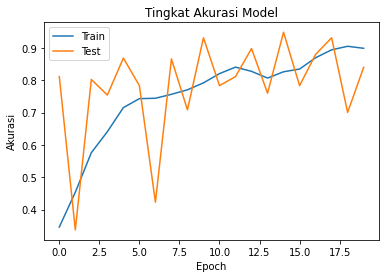

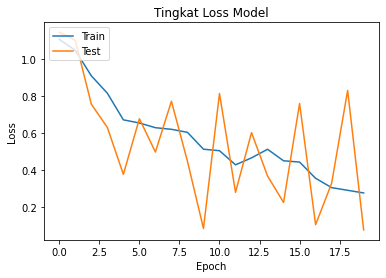

In [34]:
#menampilkan visualisasi dari hasil learning atau summary diatas
print(learning.history.keys())
import matplotlib.pyplot as plt
# Melihat Tingkat Akurasi Model
plt.plot(learning.history['accuracy'])    # Plotting learning(model fit) history untuk akurasi
plt.plot(learning.history['val_accuracy'])# Plotting learning(model fit) history untuk validation akurasi
plt.title('Tingkat Akurasi Model')        # Set Judul Gambar
plt.ylabel('Akurasi')                     # Set Label y-axis
plt.xlabel('Epoch')                       # Set Label x-axis
plt.legend(['Train', 'Test'], loc='upper left') #memberikan legend Gambar untuk memudahkan membaca
plt.show()
# # Melihat Tingkat Loss Model
plt.plot(learning.history['loss'])     # Plotting learning(model fit) history untuk Loss
plt.plot(learning.history['val_loss']) # Plotting learning(model fit) history untuk validation Loss
plt.title('Tingkat Loss Model')       # Set Judul Gambar
plt.ylabel('Loss')                        # Set Label y-axis
plt.xlabel('Epoch')                       # Set Label x-axis
plt.legend(['Train', 'Test'], loc='upper left') #memberikan legend Gambar untuk memudahkan membaca
plt.show()

Dari hasil training diatas, didapatkan hasil accurasi sebesar 90%

Prediksi Gambar

Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1 (2).png
AxesImage(54,36;334.8x217.44)
[[1. 0. 0.]]
The Image is paper


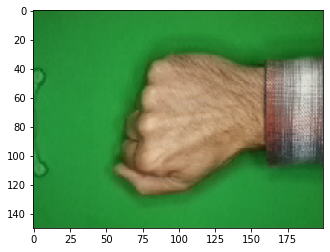

In [36]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt #import library matplotlib untuk plotting gambar
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline


uploaded = files.upload() #command untuk membuat fungsi upload gambar
for fn in uploaded.keys():
 
  #memprediksi gambar hasil upload
  fileupload = fn
  imagepred = image.load_img(fileupload, target_size=(150,200))
  plotting_img = plt.imshow(imagepred)
  print(plotting_img)
  imagepred = image.img_to_array(imagepred)
  imagepred = np.expand_dims(imagepred, axis=0)

  output = model.predict(imagepred)
  print(output) 


  if (output==[[1., 0., 0.]]).all():  #membuat kondisi if else untuk jenis prediksi yang dihasilkan
    print("The Image is paper")
  elif (output==[[0., 1., 0.]]).all():
    print("TThe Image is rock")
  elif (output==[[0., 0., 1.]]).all():
    print("The Image is scissor")


Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (1).png
AxesImage(54,36;334.8x217.44)
[[0. 0. 1.]]
The Image is scissor


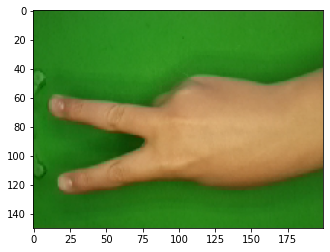

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  fileupload = fn
  imagepred = image.load_img(fileupload, target_size=(150,200))
  plotting_img = plt.imshow(imagepred)
  print(plotting_img)
  imagepred = image.img_to_array(imagepred)
  imagepred = np.expand_dims(imagepred, axis=0)

  output = model.predict(imagepred)
  print(output) 


  if (output==[[1., 0., 0.]]).all():#membuat kondisi if else untuk jenis prediksi yang dihasilkan
    print("The Image is paper")
  elif (output==[[0., 1., 0.]]).all():
    print("TThe Image is rock")
  elif (output==[[0., 0., 1.]]).all():
    print("The Image is scissor")


Saving 1Dfw5FRlS4h60JPX.png to 1Dfw5FRlS4h60JPX (1).png
AxesImage(54,36;334.8x217.44)
[[1. 0. 0.]]
The Image is paper


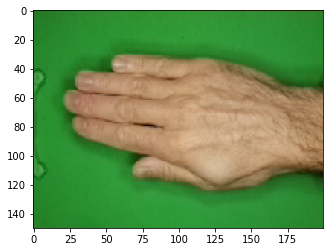

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  fileupload = fn
  imagepred = image.load_img(fileupload, target_size=(150,200))
  plotting_img = plt.imshow(imagepred)
  print(plotting_img)
  imagepred = image.img_to_array(imagepred)
  imagepred = np.expand_dims(imagepred, axis=0)

  output = model.predict(imagepred)
  print(output) 


  if (output==[[1., 0., 0.]]).all():#membuat kondisi if else untuk jenis prediksi yang dihasilkan
    print("The Image is paper")
  elif (output==[[0., 1., 0.]]).all():
    print("TThe Image is rock")
  elif (output==[[0., 0., 1.]]).all():
    print("The Image is scissor")


REFERENSI: 

https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook


https://www.kaggle.com/twhitehurst3/rock-paper-scissors-keras-cnn-99-accuracy

https://keras.io/guides/sequential_model/

https://www.kaggle.com/tobikaggle/keras-mnist-cnn-learning-curve

https://medium.com/@bcwalraven/boost-your-cnn-with-the-keras-imagedatagenerator-99b1ef262f47